### Loading the data

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import numpy as np

In [3]:
df = pd.read_csv("/Users/muhammadnabilbinkamal/Desktop/Practise Project/data/heart_failure_clinical_records_dataset.csv")

data = df

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
from collections import Counter
print('Classes and number of values in the dataset',Counter(data['DEATH_EVENT']))

Classes and number of values in the dataset Counter({0: 203, 1: 96})


In [7]:
y = data['DEATH_EVENT']

In [9]:
x = data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

### Data preprocessing

In [11]:
x = pd.get_dummies(x)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [13]:
ct = ColumnTransformer(
    [("numeric", StandardScaler(), 
      ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'])]
)

In [14]:
X_train = ct.fit_transform(X_train)

In [15]:
X_test = ct.transform(X_test)

In [16]:
le = LabelEncoder()

In [17]:
Y_train = le.fit_transform(Y_train)

In [18]:
Y_test = le.transform(Y_test)

In [25]:
Y_train = tf.keras.utils.to_categorical(Y_train)

In [26]:
Y_test = tf.keras.utils.to_categorical(Y_test)

### Design the Model

In [27]:
model = tf.keras.models.Sequential()

In [28]:
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))

/Users/muhammadnabilbinkamal/Desktop/Practise Project/myenv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [29]:
model.add(tf.keras.layers.Dense(12, activation='relu'))

In [30]:
model.add(tf.keras.layers.Dense(Y_train.shape[1], activation='softmax'))

### Train and evaluate the model

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.fit(X_train, Y_train, epochs=100, batch_size=16)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.3536 - loss: 0.9434
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4650 - loss: 0.7828
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.5307 - loss: 0.7578
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.4690 - loss: 0.7581
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.5739 - loss: 0.7154
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.5866 - loss: 0.7120
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.6608 - loss: 0.6497
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.6865 - loss: 0.6112
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.7422 - loss: 0.5726
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7579 - loss: 0.6145
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.7637 - loss: 0.5691
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [34]:
loss, acc = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}, Test Accuracy: {acc}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8246 - loss: 0.3858  
Test Loss: 0.3694725036621094, Test Accuracy: 0.8444444537162781


In [35]:
y_estimate = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [36]:
y_estimate = np.argmax(y_estimate, axis=1)

In [37]:
y_true = np.argmax(Y_test, axis=1)

In [38]:
print(classification_report(y_true, y_estimate))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        62
           1       0.82      0.64      0.72        28

    accuracy                           0.84        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.84      0.84      0.84        90



In [40]:
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [41]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8516 - loss: 0.3443 - val_accuracy: 0.8333 - val_loss: 0.2930
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8088 - loss: 0.3777 - val_accuracy: 0.8333 - val_loss: 0.2958
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8621 - loss: 0.3211 - val_accuracy: 0.8333 - val_loss: 0.2994
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8531 - loss: 0.3146 - val_accuracy: 0.8333 - val_loss: 0.3020
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8670 - loss: 0.3242 - val_accuracy: 0.8333 - val_loss: 0.3041
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8768 - loss: 0.2926 - val_accuracy: 0.8333 - val_loss: 0.3069
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8798 - loss: 0.2744 - val_accuracy: 0.8333 - val_loss: 0.3090
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8121 - loss: 0.3666 - val_accuracy: 0.8333 - v

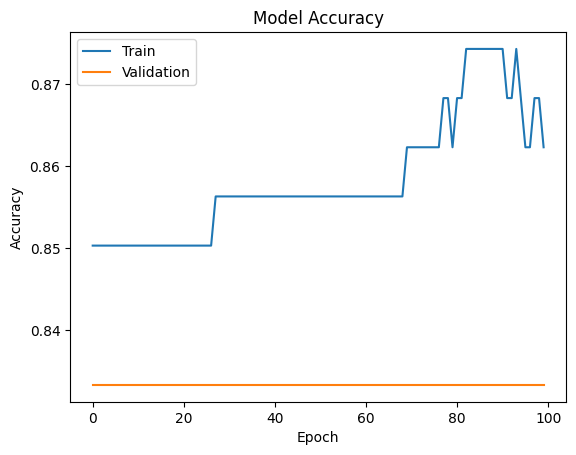

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

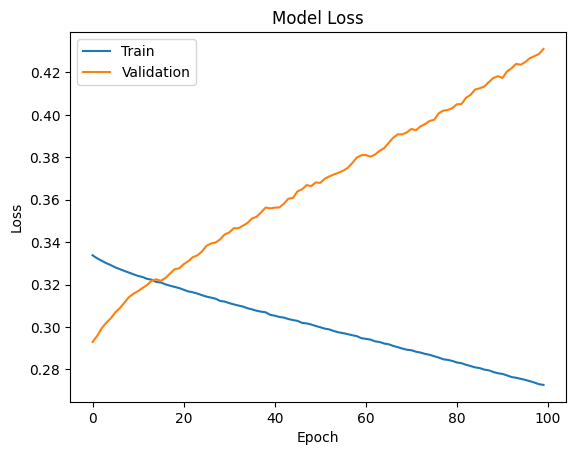

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

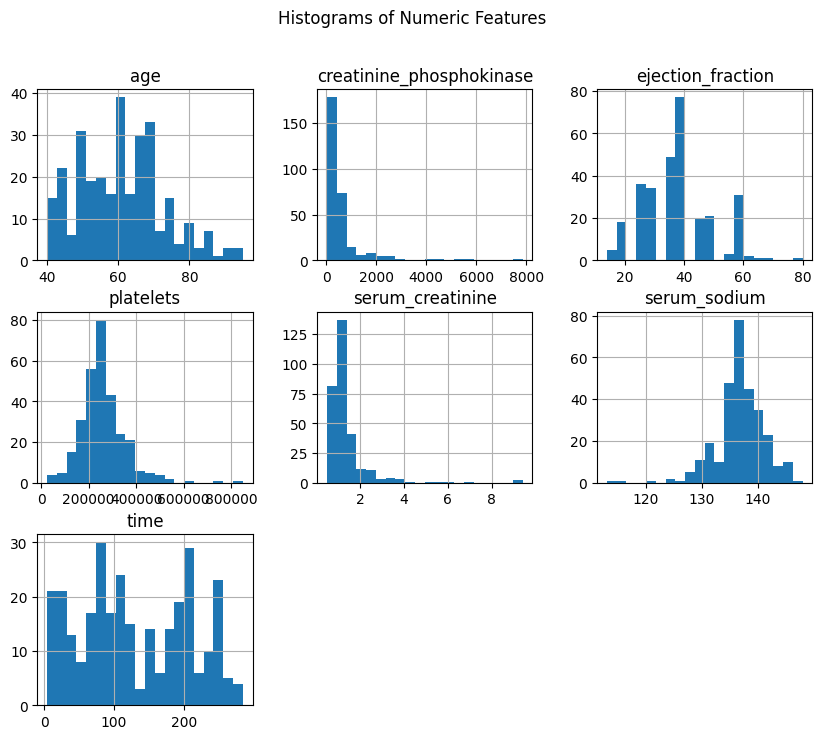

In [44]:
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 
                    'serum_creatinine', 'serum_sodium', 'time']

df[numeric_features].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Numeric Features')
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [46]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(Y_test, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [47]:
cm = confusion_matrix(y_true, y_pred)

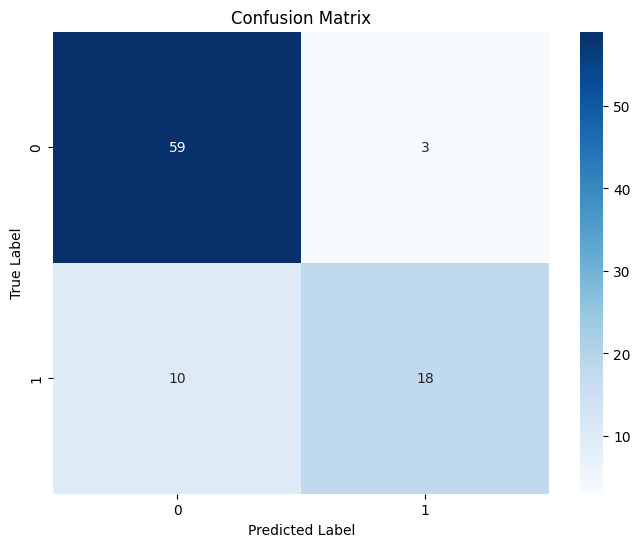

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

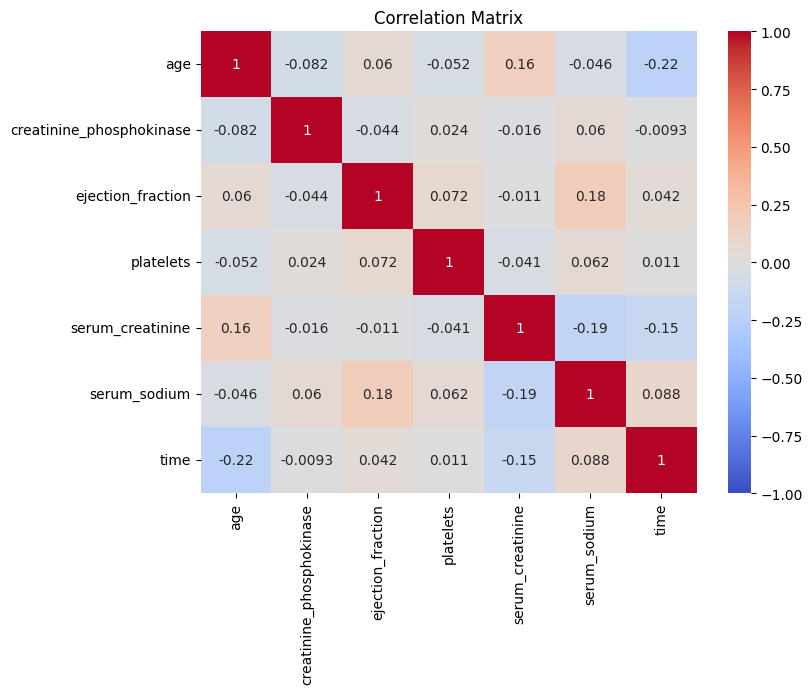

In [49]:
corr = df[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()